In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%config Completer.use_jedi = False

We will need to be able to convert from .jpg and .png to a NumPy array in order to perform clustering.

In [5]:
image_array = mpimg.imread('./data/palm_trees.jpg')
image_array.shape

(804, 536, 3)

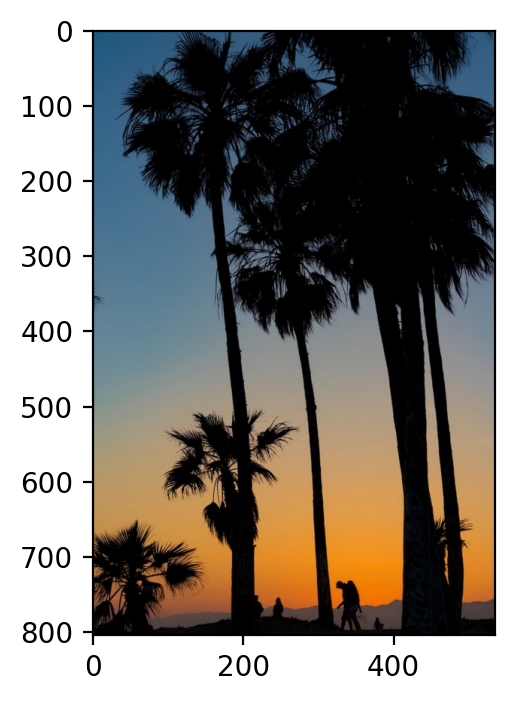

In [9]:
# plot the NumPy array using plt.imshow() to see the actual RBG image
plt.figure(dpi=200)
plt.imshow(image_array);

Now we want to convert from the 3D array to a 2D array by flattening out each of the 3 2D-arrays of pixels (one for each color channel).

In [11]:
(h, w, c) = image_array.shape

In [13]:
print(h, w, c)

804 536 3


In [14]:
image_2D = image_array.reshape(h*w, c)
image_2D

array([[ 26,  86, 123],
       [ 26,  86, 123],
       [ 27,  87, 124],
       ...,
       [  8,   8,  10],
       [  8,   8,  10],
       [  8,   8,  10]], dtype=uint8)

In [15]:
image_2D.shape

(430944, 3)

In [16]:
h*w

430944

### K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
# goal: we want to only use K colors for the image
K = 6
model = KMeans(n_clusters=K)

In [19]:
labels = model.fit_predict(image_2D)

In [20]:
labels

array([2, 2, 2, ..., 3, 3, 3])

In [23]:
rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[ 64,  59,  59],
       [192, 153, 106],
       [ 72, 109, 137],
       [  3,   3,   4],
       [138, 143, 142],
       [217, 134,  45]])

In [25]:
# we know the labels array is associated with the rgb_codes array: label 0 is color 0 (rgb_codes[0]), etc.
rgb_codes[labels]

# so this gives the pixels reassigned to the new averaged colors!

array([[ 72, 109, 137],
       [ 72, 109, 137],
       [ 72, 109, 137],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [28]:
# quantized image
new_image = np.reshape(rgb_codes[labels], (h, w, c))  
new_image

array([[[ 72, 109, 137],
        [ 72, 109, 137],
        [ 72, 109, 137],
        ...,
        [ 64,  59,  59],
        [ 64,  59,  59],
        [ 64,  59,  59]],

       [[ 72, 109, 137],
        [ 72, 109, 137],
        [ 72, 109, 137],
        ...,
        [ 72, 109, 137],
        [ 64,  59,  59],
        [ 64,  59,  59]],

       [[ 72, 109, 137],
        [ 72, 109, 137],
        [ 72, 109, 137],
        ...,
        [ 64,  59,  59],
        [ 64,  59,  59],
        [ 64,  59,  59]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

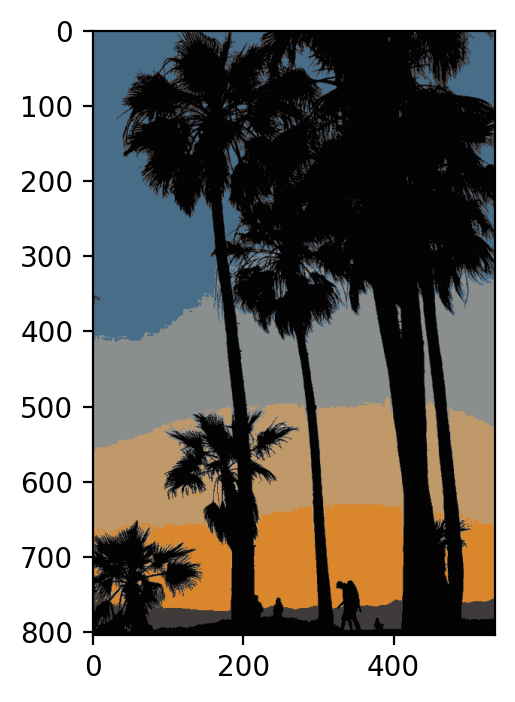

In [29]:
plt.figure(dpi=200)
plt.imshow(new_image);